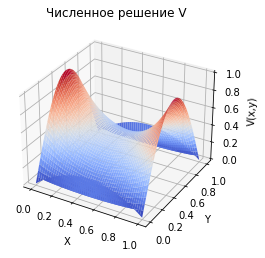

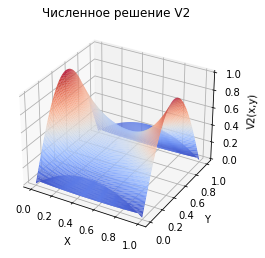

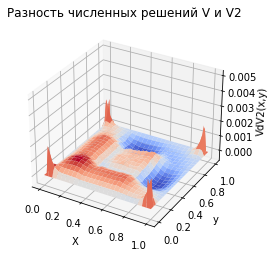

In [14]:
import pandas as pd
import os.path
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

Data = [pd.read_csv("tableV.csv", sep = ',', index_col=0, encoding='cp1251'), 
        pd.read_csv("tableV2.csv", sep = ',', index_col=0, encoding='cp1251'), 
        pd.read_csv("tableVdV2.csv", sep = ',', index_col=0, encoding='cp1251')]

for i in range(3):
  Data[i].drop(Data[i].index[[0]], inplace = True)
  Data[i].drop(Data[i].columns[0], axis = 1, inplace = True)
  Data[i] = Data[i].to_numpy()
  Data[i] = Data[i].astype('float64')

n = Data[0][0].size # узлы по x
m = Data[0][:,0].size # узлы по y

fig = plt.figure(0, figsize = (7, 4))
ax = fig.add_subplot(projection = '3d')
X = np.linspace(0, 1, n)
Y = np.linspace(0, 1, m)
X2 = np.linspace(0, 1, 2*n - 1)
Y2 = np.linspace(0, 1, 2*m - 1)
x, y = np.meshgrid(X, Y)
x2, y2 = np.meshgrid(X2, Y2)
z = [Data[0], Data[1], Data[2]]

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('V(x,y)')
ax.set_title('Численное решение V')
ax.plot_surface(x, y, z[0], rstride = 1, cstride = 1, cmap=cm.coolwarm) 

fig = plt.figure(1, figsize = (7, 4))
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('V2(x,y)')
ax.set_title('Численное решение V2')
ax.plot_surface(x2, y2, z[1], rstride = 1, cstride = 1, cmap = cm.coolwarm) # rstride = 1, cstride = 1

fig = plt.figure(2, figsize = (7, 4))
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_zlabel('VdV2(x,y)')
ax.set_title('Разность численных решений V и V2')
ax.plot_surface(x, y, z[2], cmap = cm.coolwarm) # rstride = 1, cstride = 1

plt.show()